<a href="https://colab.research.google.com/github/zahra-zarrabi/GAN/blob/master/Pix2Pix_night2day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
Img_width = 256
Img_height=256

In [3]:
model=load_model('/content/drive/MyDrive/Pix2Pix/model_night2day.h5')

In [5]:
image = tf.io.read_file('images.jpg')
image=tf.image.decode_jpeg(image)

# Convert both images to float32 tensors
input_image = tf.cast(image, tf.float32)


In [6]:
print(type(input_image))
print(input_image.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(183, 275, 3)


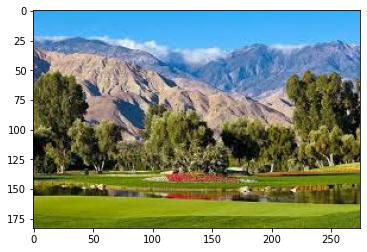

In [7]:
plt.figure()
plt.imshow(input_image/255.)


In [8]:
input_image=tf.image.resize(input_image, [Img_height, Img_width])
input_image.shape


TensorShape([256, 256, 3])

In [9]:
input_image = input_image[tf.newaxis]
input_image = (input_image/127.5)-1
input_image.shape

TensorShape([1, 256, 256, 3])

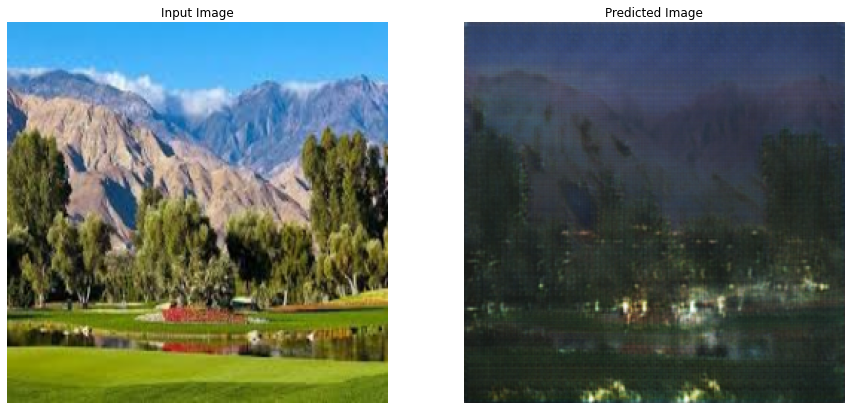

In [10]:
prediction = model(input_image, training=True)

plt.figure(figsize=(15,15))
display_list = [input_image[0],prediction[0]]
title = ['Input Image', 'Predicted Image']

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.title(title[i])
  # Getting the pixel values in the [0, 1] range to plot.
  plt.imshow(display_list[i] * 0.5 + 0.5)
  plt.axis('off')
plt.show()